# Sentiment Analysis - EDA

In [2]:
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn")
sns.set(style="white")
import warnings, sys, os
from pathlib import Path
path = Path(os.getcwd())
sys.path.append(str(path.parent))
warnings.filterwarnings('ignore')  
%matplotlib inline
data_directory = '../data'

In [3]:
def group2(row):
    global grp
    if row['group_id'] == 1: grp = 1
    elif row['group_id'] == 2: grp = 2
    elif row['group_id'] == 3: grp = 3
    elif row['group_id'] == 4: grp = 4
    elif row['group_id'] == 5: grp = 4
    elif row['group_id'] == 6: grp = 4
    elif row['group_id'] == 7: grp = 5
    elif row['group_id'] == 8: grp = 5
    elif row['group_id'] == 9: grp = 6
    elif row['group_id'] == 10 : grp = 6
    elif row['group_id'] == 11 : grp = 7
    elif row['group_id'] == 12 : grp = 7
    elif row['group_id'] == 13 : grp = 8
    elif row['group_id'] == 14 : grp = 9
    elif row['group_id'] == 15 : grp = 10
    elif row['group_id'] == 16 : grp = 11
    elif row['group_id'] == 17 : grp = 12
    elif row['group_id'] == 19 : grp = 13
    elif row['group_id'] == 20 : grp = 14
    elif row['group_id'] == 21 : grp = 15
    elif row['group_id'] == 22 : grp = 16
    elif row['group_id'] == 23 : grp = 17
    elif row['group_id'] == 24 : grp = 18
    elif row['group_id'] == 25 : grp = 19
    elif row['group_id'] == 28 : grp = 20
    elif row['group_id'] == 29 : grp = 21
    elif row['group_id'] == 30 : grp = 22
    elif row['group_id'] == 31 : grp = 22
    elif row['group_id'] == 32 : grp = 22
    elif row['group_id'] == 33 : grp = 22
    elif row['group_id'] == 34 : grp = 22
    elif row['group_id'] == 35 : grp = 22
    elif row['group_id'] == 36 : grp = 22
    elif row['group_id'] == 37 : grp = 22
    elif row['group_id'] == 38 : grp = 22
    elif row['group_id'] == 39 : grp = 22
    elif row['group_id'] == 40 : grp = 22
    elif row['group_id'] == 41 : grp = 23
    elif row['group_id'] == 42 : grp = 23
    elif row['group_id'] == 43 : grp = 23
    elif row['group_id'] == 44 : grp = 23
    elif row['group_id'] == 45 : grp = 23
    elif row['group_id'] == 46 : grp = 23
    elif row['group_id'] == 47 : grp = 24
    elif row['group_id'] == 48 : grp = 25
    elif row['group_id'] == 49 : grp = 26
    elif row['group_id'] == 50 : grp = 27
    elif row['group_id'] == 51 : grp = 28
    elif row['group_id'] == 52 : grp = 29
    elif row['group_id'] == 53 : grp = 29
    elif row['group_id'] == 54 : grp = 29
    elif row['group_id'] == 55 : grp = 29
    elif row['group_id'] == 56 : grp = 30
    elif row['group_id'] == 57 : grp = 31
    elif row['group_id'] == 58 : grp = 32
    elif row['group_id'] == 59 : grp = 34
    elif row['group_id'] == 60 : grp = 35
    elif row['group_id'] == 61 : grp = 36
    elif row['group_id'] == 62 : grp = 37
    elif row['group_id'] == 63 : grp = 38
    elif row['group_id'] == 64 : grp = 39
    elif row['group_id'] == 65 : grp = 40
    elif row['group_id'] == 66 : grp = 41
    elif row['group_id'] == 67 : grp = 42
    elif row['group_id'] == 68 : grp = 43
    elif row['group_id'] == 69 : grp = 44
    elif row['group_id'] == 70 : grp = 45
    elif row['group_id'] == 71 : grp = 46
    elif row['group_id'] == 72 : grp = 46
    elif row['group_id'] == 73 : grp = 46
    elif row['group_id'] == 74 : grp = 47
    elif row['group_id'] == 75 : grp = 48
    elif row['group_id'] == 76 : grp = 49
    elif row['group_id'] == 77 : grp = 50
    elif row['group_id'] == 78 : grp = 51
    elif row['group_id'] == 81 : grp = 52
    elif row['group_id'] == 82 : grp = 53
    elif row['group_id'] == 83 : grp = 54
    elif row['group_id'] == 84 : grp = 55
    elif row['group_id'] == 85 : grp = 56
    elif row['group_id'] == 86 : grp = 56
    elif row['group_id'] == 87 : grp = 56
    elif row['group_id'] == 88 : grp = 57
    elif row['group_id'] == 89 : grp = 58

    return grp

In [4]:
dreams_groups_intensity=pd.read_csv(f'{data_directory}/sa/out/dreams_groups_intensity.csv',delimiter=',')

In [5]:
dreammers_summary=pd.read_csv(f'{data_directory}/dreamers_summary.csv',delimiter='|')

In [6]:
#dreams_groups_intensity.head()

In [7]:
dreams_groups_intensity['group_id_2']=dreams_groups_intensity.apply(group2 , axis=1)
#dreams_groups_intensity.head()

## Generacion de datos para los cortes de los distintos graficos


In [8]:
listAge = list(set(dreammers_summary["dreamer age"].tolist()))
listAge

['?',
 'adult',
 'middle-aged',
 'young-adult',
 'series',
 'teenagers',
 'middle-childhood']

In [10]:
#Dreammers by age
group_middle_childhood = dreammers_summary[(dreammers_summary["dreamer age"] == "middle-childhood")]["id"].tolist()
group_teenagers = dreammers_summary[(dreammers_summary["dreamer age"] == "teenagers")]["id"].tolist()
group_young_adult = dreammers_summary[(dreammers_summary["dreamer age"] == "young-adult")]["id"].tolist()
group_middle_aged = dreammers_summary[(dreammers_summary["dreamer age"] == "middle-aged")]["id"].tolist()
group_adult = dreammers_summary[(dreammers_summary["dreamer age"] == "adult")]["id"].tolist()

group_middle_childhood=dreams_groups_intensity[dreams_groups_intensity["group_id"].isin(group_middle_childhood)]
group_teenagers=dreams_groups_intensity[dreams_groups_intensity["group_id"].isin(group_teenagers)]
group_young_adult=dreams_groups_intensity[dreams_groups_intensity["group_id"].isin(group_young_adult)]
group_middle_aged=dreams_groups_intensity[dreams_groups_intensity["group_id"].isin(group_middle_aged)]
group_adult=dreams_groups_intensity[dreams_groups_intensity["group_id"].isin(group_adult)]

In [11]:
#Dreammers by sex
group_female = dreammers_summary[(dreammers_summary["dreamer sex"] == "female")]["id"].tolist()
group_male = dreammers_summary[(dreammers_summary["dreamer sex"] == "male")]["id"].tolist()
dreams_groups_intensity_female=dreams_groups_intensity[dreams_groups_intensity["group_id"].isin(group_female)]
dreams_groups_intensity_male=dreams_groups_intensity[dreams_groups_intensity["group_id"].isin(group_male)]


In [12]:
#Dreammers by group
group_Phil=[71,72,73]
group_Vet=[85,86,87]
dreams_groups_intensity_phil=dreams_groups_intensity[dreams_groups_intensity["group_id"].isin(group_Phil)]
dreams_groups_intensity_vet=dreams_groups_intensity[dreams_groups_intensity["group_id"].isin(group_Vet)]
# dreams_groups_intensity

## Analisis para Dominant ****Sentiment****

In [13]:
#Genero un df con el acumulado de Positive y Negative para todo el DataSet
#Saco los valores neutrales ya que son despreciables en comparacion a los negativos y positivos
ds_full=dreams_groups_intensity[["Dominant_Sentment"]]['Dominant_Sentment'].value_counts().reset_index(name ='ds_full')    
ds_full=ds_full[:-1]
ds_full

,index,ds_full
0,Negative,24022
1,Positive,19099


In [14]:
#Genero un df con el acumulado de Positive y Negative para ['teenagers', 'adult', 'middle-aged','middle-childhood', 'young-adult',]
ds_middle_childhood=group_middle_childhood[["Dominant_Sentment"]]['Dominant_Sentment'].value_counts().reset_index(name ='middle_childhood') 
ds_teenagers=group_teenagers[["Dominant_Sentment"]]['Dominant_Sentment'].value_counts().reset_index(name ='teenagers') 
ds_young_adult=group_young_adult[["Dominant_Sentment"]]['Dominant_Sentment'].value_counts().reset_index(name ='young_adult') 
ds_middle_aged=group_teenagers[["Dominant_Sentment"]]['Dominant_Sentment'].value_counts().reset_index(name ='middle_aged') 
ds_adult=group_adult[["Dominant_Sentment"]]['Dominant_Sentment'].value_counts().reset_index(name ='adult') 

aux1=ds_middle_childhood['middle_childhood']
aux2=ds_teenagers['teenagers']
aux3=ds_young_adult['young_adult']
aux4=ds_middle_aged['middle_aged']
consolidadoEdades = ((((ds_adult.join(aux1)).join(aux2)).join(aux3)).join(aux4))
consolidadoEdades.rename(columns = {'index':'Dominant_Sentiment'}, inplace = True) 
consolidadoEdades=consolidadoEdades[:-1]
consolidadoEdades

,Dominant_Sentiment,adult,middle_childhood,teenagers,young_adult,middle_aged
0,Positive,2022,388.0,2066,3952.0,2066
1,Negative,1656,281.0,1793,3122.0,1793


In [15]:
#Genero un df con el acumulado de Positive y Negative Vet y Phil
ds_phil=dreams_groups_intensity_phil[["Dominant_Sentment"]]['Dominant_Sentment'].value_counts().reset_index(name ='Phil')  
ds_vet=dreams_groups_intensity_vet[["Dominant_Sentment"]]['Dominant_Sentment'].value_counts().reset_index(name ='Vet')  

consolidadoPhilVet = pd.merge(ds_vet,ds_phil,on="index")
consolidadoPhilVet.rename(columns = {'index':'Dominant_Sentiment'}, inplace = True) 
consolidadoPhilVet

,Dominant_Sentiment,Vet,Phil
0,Negative,403,242
1,Positive,190,264


In [16]:
#Genero un df con el acumulado de Positive y Negative para male y female
ds_female=dreams_groups_intensity_female[["Dominant_Sentment"]]['Dominant_Sentment'].value_counts().reset_index(name ='female')  
ds_male=dreams_groups_intensity_male[["Dominant_Sentment"]]['Dominant_Sentment'].value_counts().reset_index(name ='male')  

consolidadoSexo = pd.merge(ds_female,ds_male,on="index")
consolidadoSexo.rename(columns = {'index':'Dominant_Sentiment'}, inplace = True) 
consolidadoSexo=consolidadoSexo[:-1]
consolidadoSexo

,Dominant_Sentiment,female,male
0,Positive,14389,4196
1,Negative,13326,4284


## Analisis para Dominant ****Emotion****

In [17]:
de_full=dreams_groups_intensity[["Dominant_Emotion"]]['Dominant_Emotion'].value_counts().reset_index(name ='de_full') 
de_full

,index,de_full
0,Trust,14208
1,Fear,9863
2,Joy,6794
3,Sadness,4586
4,Anger,3751
5,Anticipation,2432
6,Disgust,1441
7,Surprise,57


In [18]:
#Genero un df con el acumulado de sentimientos para ['teenagers', 'adult', 'middle-aged', '?', 'middle-childhood', 'young-adult', 'series']
de_middle_childhood=group_middle_childhood[["Dominant_Emotion"]]['Dominant_Emotion'].value_counts().reset_index(name ='middle_childhood') 
de_teenagers=group_teenagers[["Dominant_Emotion"]]['Dominant_Emotion'].value_counts().reset_index(name ='teenagers') 
de_young_adult=group_young_adult[["Dominant_Emotion"]]['Dominant_Emotion'].value_counts().reset_index(name ='young_adult') 
de_middle_aged=group_teenagers[["Dominant_Emotion"]]['Dominant_Emotion'].value_counts().reset_index(name ='middle_aged') 
de_adult=group_adult[["Dominant_Emotion"]]['Dominant_Emotion'].value_counts().reset_index(name ='adult') 

emocionesEdades = pd.merge(de_middle_childhood,de_teenagers,on="index")
emocionesEdades = pd.merge(emocionesEdades,de_young_adult,on="index")
emocionesEdades = pd.merge(emocionesEdades,de_middle_aged,on="index")
emocionesEdades = pd.merge(emocionesEdades,de_adult,on="index")
emocionesEdades.rename(columns = {'index':'Dominant_Emotion'}, inplace = True) 
emocionesEdades

,Dominant_Emotion,middle_childhood,teenagers,young_adult,middle_aged,adult
0,Trust,269,1461,3075,1461,1623
1,Joy,147,713,1506,713,536
2,Fear,80,513,770,513,384
3,Anger,55,435,513,435,395
4,Sadness,53,367,549,367,310
5,Disgust,33,149,179,149,125
6,Anticipation,32,217,476,217,298


In [19]:
#Genero un df con el acumulado de sentimientos para Vet y Phil
de_phil=dreams_groups_intensity_phil[["Dominant_Emotion"]]['Dominant_Emotion'].value_counts().reset_index(name ='Phil')  
de_vet=dreams_groups_intensity_vet[["Dominant_Emotion"]]['Dominant_Emotion'].value_counts().reset_index(name ='Vet')  

emocionesPhilVet = pd.merge(de_vet,de_phil,on="index")
emocionesPhilVet.rename(columns = {'index':'Dominant_Emotion'}, inplace = True) 
emocionesPhilVet

,Dominant_Emotion,Vet,Phil
0,Fear,171,49
1,Trust,159,214
2,Joy,87,73
3,Sadness,87,43
4,Anger,47,61
5,Anticipation,28,55
6,Disgust,14,9


In [20]:
#Genero un df con el acumulado de sentimientos para male y female
de_female=dreams_groups_intensity_female[["Dominant_Emotion"]]['Dominant_Emotion'].value_counts().reset_index(name ='female')  
de_male=dreams_groups_intensity_male[["Dominant_Emotion"]]['Dominant_Emotion'].value_counts().reset_index(name ='male')  

emocionesSexo = pd.merge(de_female,de_male,on="index")
emocionesSexo.rename(columns = {'index':'Dominant_Emotion'}, inplace = True) 
emocionesSexo


,Dominant_Emotion,female,male
0,Trust,11216,2922
1,Joy,5109,1517
2,Fear,3472,1228
3,Sadness,2728,819
4,Anger,2548,899
5,Anticipation,1640,691
6,Disgust,973,385
7,Surprise,35,20


## Graficos todo el Corpus

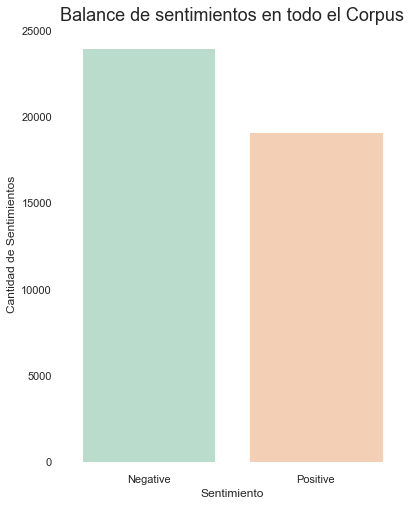

In [21]:
f, ax = plt.subplots(figsize=(6, 8))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x='index', y='ds_full', data=ds_full, color='b',palette="Pastel2")
ax.set(ylabel="Cantidad de Sentimientos", xlabel="Sentimiento")
ax.set_title("Balance de sentimientos en todo el Corpus", fontsize=18)
sns.despine(left=True, bottom=True)
plt.savefig(f"{data_directory}/sa/img/corpus_sentimiento.png")

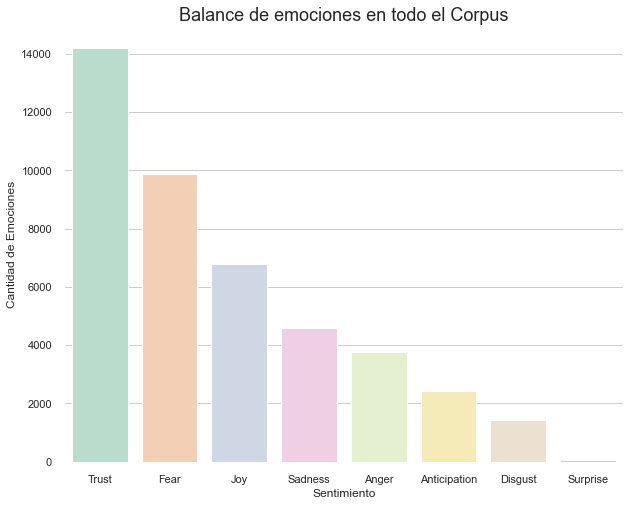

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x='index', y='de_full', data=de_full, color='b',palette="Pastel2")
ax.set(ylabel="Cantidad de Emociones", xlabel="Sentimiento")
ax.set_title("Balance de emociones en todo el Corpus", fontsize=18)
sns.despine(left=True, bottom=True)
plt.savefig(f"{data_directory}/sa/img/corpus_emocion.png")

## Graficos segmentados Phil y Vet


In [23]:
# Paso a porcentajes las emociones de Vet y Phil para poder compararlas.
emoPhilVetPorc = emocionesPhilVet.copy()
emoPhilVetPorc["Vet"] = emoPhilVetPorc['Vet']/emoPhilVetPorc['Vet'].sum()
emoPhilVetPorc["Phil"] = emoPhilVetPorc['Phil']/emoPhilVetPorc['Phil'].sum()
emoPhilVetPorc

,Dominant_Emotion,Vet,Phil
0,Fear,0.288364,0.097222
1,Trust,0.268128,0.424603
2,Joy,0.146712,0.144841
3,Sadness,0.146712,0.085317
4,Anger,0.079258,0.121032
5,Anticipation,0.047218,0.109127
6,Disgust,0.023609,0.017857


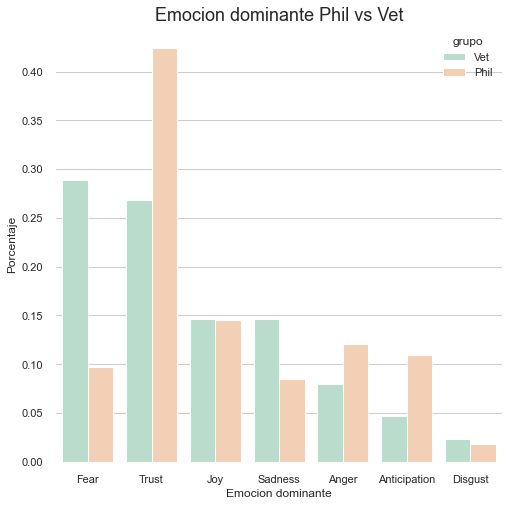

In [24]:
emoPhilVetPorcGraph = pd.melt(emoPhilVetPorc, id_vars="Dominant_Emotion", var_name="grupo", value_name="cantidad")

f, ax = plt.subplots(figsize=(8, 8))
sns.set(style="whitegrid")
sns.barplot(x='Dominant_Emotion', y='cantidad', hue='grupo', data=emoPhilVetPorcGraph, palette="Pastel2")
ax.set_title("Emocion dominante Phil vs Vet", fontsize=18)
ax.set(ylabel="Porcentaje", xlabel="Emocion dominante")
sns.despine(left=True, bottom=True)
plt.savefig(f"{data_directory}/sa/img/emociones_grupo_porcentaje.png")

In [25]:
# Paso a porcentajes los sentimientos de Vet y Phil para poder compararlos.
sentPhilVetPorc = consolidadoPhilVet.copy()
sentPhilVetPorc["Vet"] = sentPhilVetPorc['Vet']/sentPhilVetPorc['Vet'].sum()
sentPhilVetPorc["Phil"] = sentPhilVetPorc['Phil']/sentPhilVetPorc['Phil'].sum()
sentPhilVetPorc

,Dominant_Sentiment,Vet,Phil
0,Negative,0.679595,0.478261
1,Positive,0.320405,0.521739


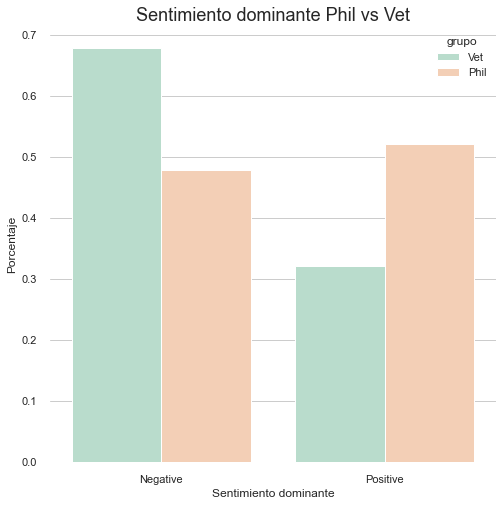

In [26]:
sentPhilVetPorcGraph = pd.melt(sentPhilVetPorc, id_vars="Dominant_Sentiment", var_name="grupo", value_name="cantidad")

f, ax = plt.subplots(figsize=(8, 8))
sns.set(style="whitegrid")
sns.barplot(x='Dominant_Sentiment', y='cantidad', hue='grupo', data=sentPhilVetPorcGraph, palette="Pastel2")
ax.set_title("Sentimiento dominante Phil vs Vet", fontsize=18)
ax.set(ylabel="Porcentaje", xlabel="Sentimiento dominante")
sns.despine(left=True, bottom=True)

plt.savefig(f"{data_directory}/sa/img/sentimiento_grupo_porcentaje.png")

## Graficos segmentados Grupos de Edad

In [27]:
# Paso a porcentajes los sentimientos de los grupos de edades para compararlos.
emocionesEdadesPorc = emocionesEdades.copy()
emocionesEdadesPorc["middle_childhood"] = emocionesEdadesPorc['middle_childhood']/emocionesEdadesPorc['middle_childhood'].sum()
emocionesEdadesPorc["teenagers"] = emocionesEdadesPorc['teenagers']/emocionesEdadesPorc['teenagers'].sum()
emocionesEdadesPorc["young_adult"] = emocionesEdadesPorc['young_adult']/emocionesEdadesPorc['young_adult'].sum()
emocionesEdadesPorc["middle_aged"] = emocionesEdadesPorc['middle_aged']/emocionesEdadesPorc['middle_aged'].sum()
emocionesEdadesPorc["adult"] = emocionesEdadesPorc['adult']/emocionesEdadesPorc['adult'].sum()
emocionesEdadesPorc

,Dominant_Emotion,middle_childhood,teenagers,young_adult,middle_aged,adult
0,Trust,0.402093,0.378988,0.435059,0.378988,0.442114
1,Joy,0.219731,0.184955,0.213073,0.184955,0.146009
2,Fear,0.119581,0.133074,0.108942,0.133074,0.104604
3,Anger,0.082212,0.112840,0.072581,0.112840,0.107600
4,Sadness,0.079223,0.095201,0.077674,0.095201,0.084446
5,Disgust,0.049327,0.038651,0.025325,0.038651,0.034051
6,Anticipation,0.047833,0.056291,0.067346,0.056291,0.081177


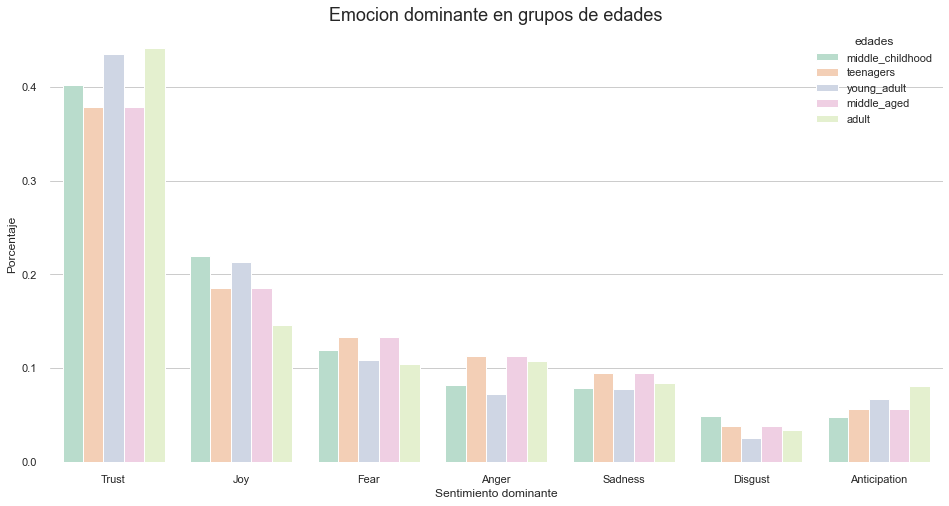

In [28]:
emocionesEdadesPorcGraph = pd.melt(emocionesEdadesPorc, id_vars="Dominant_Emotion", var_name="edades", value_name="cantidad")

f, ax = plt.subplots(figsize=(16, 8))
sns.set(style="whitegrid")
sns.barplot(x='Dominant_Emotion', y='cantidad', hue='edades', data=emocionesEdadesPorcGraph, palette="Pastel2")
ax.set_title("Emocion dominante en grupos de edades", fontsize=18)
ax.set(ylabel="Porcentaje", xlabel="Sentimiento dominante")
sns.despine(left=True, bottom=True)
plt.savefig(f"{data_directory}/sa/img/emociones_edades_porcentaje.png")

In [29]:
# Paso a porcentajes los sentimientos de los grupos de edades para compararlos.
sentimientosEdadesPorc = consolidadoEdades.copy()
sentimientosEdadesPorc["middle_childhood"] = sentimientosEdadesPorc['middle_childhood']/sentimientosEdadesPorc['middle_childhood'].sum()
sentimientosEdadesPorc["teenagers"] = sentimientosEdadesPorc['teenagers']/sentimientosEdadesPorc['teenagers'].sum()
sentimientosEdadesPorc["young_adult"] = sentimientosEdadesPorc['young_adult']/sentimientosEdadesPorc['young_adult'].sum()
sentimientosEdadesPorc["middle_aged"] = sentimientosEdadesPorc['middle_aged']/sentimientosEdadesPorc['middle_aged'].sum()
sentimientosEdadesPorc["adult"] = sentimientosEdadesPorc['adult']/sentimientosEdadesPorc['adult'].sum()
sentimientosEdadesPorc

,Dominant_Sentiment,adult,middle_childhood,teenagers,young_adult,middle_aged
0,Positive,0.549755,0.57997,0.535372,0.558666,0.535372
1,Negative,0.450245,0.42003,0.464628,0.441334,0.464628


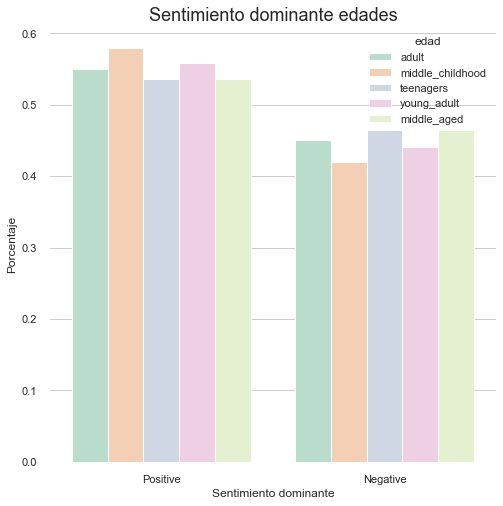

In [30]:
sentimientosEdadesPorcGraph = pd.melt(sentimientosEdadesPorc, id_vars="Dominant_Sentiment", var_name="edad", value_name="cantidad")

f, ax = plt.subplots(figsize=(8, 8))
sns.set(style="whitegrid")
sns.barplot(x='Dominant_Sentiment', y='cantidad', hue='edad', data=sentimientosEdadesPorcGraph, palette="Pastel2")
ax.set_title("Sentimiento dominante edades", fontsize=18)
ax.set(ylabel="Porcentaje", xlabel="Sentimiento dominante")
sns.despine(left=True, bottom=True)

plt.savefig(f"{data_directory}/sa/img/sentimientos_edades_porcentaje.png")

## Graficos segmentados Sexo


In [31]:
# Paso a porcentajes las emociones de male y female para poder compararlos.
consolidadoSexoPorc = consolidadoSexo.copy()
consolidadoSexoPorc["male"] = consolidadoSexoPorc['male']/consolidadoSexoPorc['male'].sum()
consolidadoSexoPorc["female"] = consolidadoSexoPorc['female']/consolidadoSexoPorc['female'].sum()
consolidadoSexoPorc

,Dominant_Sentiment,female,male
0,Positive,0.519177,0.494811
1,Negative,0.480823,0.505189


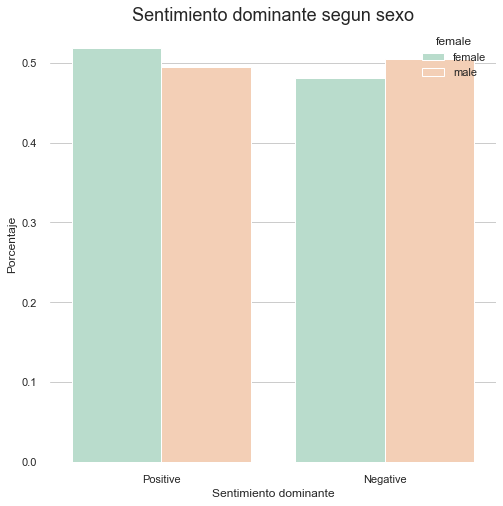

In [32]:
consolidadoSexoPorcGraph = consolidadoSexoPorc.melt('Dominant_Sentiment', var_name='female', value_name='male')

f, ax = plt.subplots(figsize=(8, 8))
sns.set(style="whitegrid")
sns.barplot(x='Dominant_Sentiment', y='male', hue='female', data=consolidadoSexoPorcGraph, palette="Pastel2")
ax.set_title("Sentimiento dominante segun sexo", fontsize=18)
ax.set(ylabel="Porcentaje", xlabel="Sentimiento dominante")
sns.despine(left=True, bottom=True)

plt.savefig(f"{data_directory}/sa/img/sentimientos_sexos_porcentaje.png")

In [33]:
# Paso a porcentajes las emociones de male y female para poder compararlos.
emocionesSexoPorc = emocionesSexo.copy()
emocionesSexoPorc["male"] = emocionesSexoPorc['male']/emocionesSexoPorc['male'].sum()
emocionesSexoPorc["female"] = emocionesSexoPorc['female']/emocionesSexoPorc['female'].sum()
emocionesSexoPorc

,Dominant_Emotion,female,male
0,Trust,0.404603,0.344535
1,Joy,0.184301,0.178870
2,Fear,0.125248,0.144794
3,Sadness,0.098409,0.096569
4,Anger,0.091916,0.106002
5,Anticipation,0.059161,0.081476
6,Disgust,0.035100,0.045396
7,Surprise,0.001263,0.002358


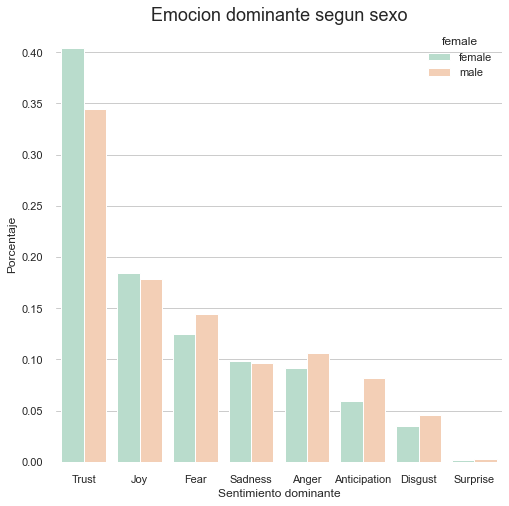

In [34]:
emocionesSexoPorcGraph = emocionesSexoPorc.melt('Dominant_Emotion', var_name='female', value_name='male')

f, ax = plt.subplots(figsize=(8, 8))
sns.set(style="whitegrid")
sns.barplot(x='Dominant_Emotion', y='male', hue='female', data=emocionesSexoPorcGraph, palette="Pastel2")
ax.set_title("Emocion dominante segun sexo", fontsize=18)
ax.set(ylabel="Porcentaje", xlabel="Sentimiento dominante")
sns.despine(left=True, bottom=True)

plt.savefig(f"{data_directory}/sa/img/emocion_sexos_porcentaje.png")

In [23]:
# fig = plt.figure(figsize=(10,4))
# title = fig.suptitle("Sentimiento dominante segun sexo", fontsize=18)
# fig.subplots_adjust(top=0.85, wspace=0.3)

# ax1 = fig.add_subplot(1,2,1)
# ax1.set_title("Female")
# sns.barplot(y='index', x='female', data=ds_female, color='g')
# sns.despine(left=True, bottom=True)

# ax2 = fig.add_subplot(1,2,2)
# ax2.set_title("Male")
# sns.barplot(y='index', x='male', data=ds_male, color='g')
# sns.despine(left=True, bottom=True)
# #plt.savefig(f"{data_directory}/sa/img/sentimientos_sexos_2.png")

In [35]:
dreams_intensity_count=pd.DataFrame(dreams_groups_intensity.groupby(['group_id','Dominant_Emotion']).size().astype(int).reset_index(name='counts'))

def rep(row):
    if (row['Dominant_Emotion'] == "Joy") or (row['Dominant_Emotion'] == "Trust") or (row['Dominant_Emotion'] == "Anticipation"):
        val = "Positive"
    elif (row['Dominant_Emotion'] == "Anger") or (row['Dominant_Emotion'] == "Fear") or (row['Dominant_Emotion'] == "Disgust") or (row['Dominant_Emotion'] == "Sadness"):
        val = "Negative"
    else:
        val = "Neutral"
    return val

dreams_intensity_count['Dominant_Sentiment']=dreams_intensity_count.apply(rep, axis=1)
dreams_intensity_count

,group_id,Dominant_Emotion,counts,Dominant_Sentiment
0,1,Anger,16,Negative
1,1,Anticipation,13,Positive
2,1,Disgust,9,Negative
3,1,Fear,49,Negative
4,1,Joy,27,Positive
...,...,...,...,...
615,89,Disgust,1,Negative
616,89,Fear,10,Negative
617,89,Joy,37,Positive
618,89,Sadness,7,Negative


###  Gráfico para el total de los sueños

In [36]:
dreams_intensity_total=pd.DataFrame(dreams_groups_intensity.groupby(['group_id_2','Dominant_Emotion']).size().astype(int).reset_index(name='counts'))
dreams_intensity_total['Dominant_Sentiment']=dreams_intensity_total.apply(rep, axis=1)
dreams_intensity_total.head()

,group_id_2,Dominant_Emotion,counts,Dominant_Sentiment
0,1,Anger,16,Negative
1,1,Anticipation,13,Positive
2,1,Disgust,9,Negative
3,1,Fear,49,Negative
4,1,Joy,27,Positive


In [37]:
tmp=dreams_intensity_total[dreams_intensity_total["group_id_2"]<=20]

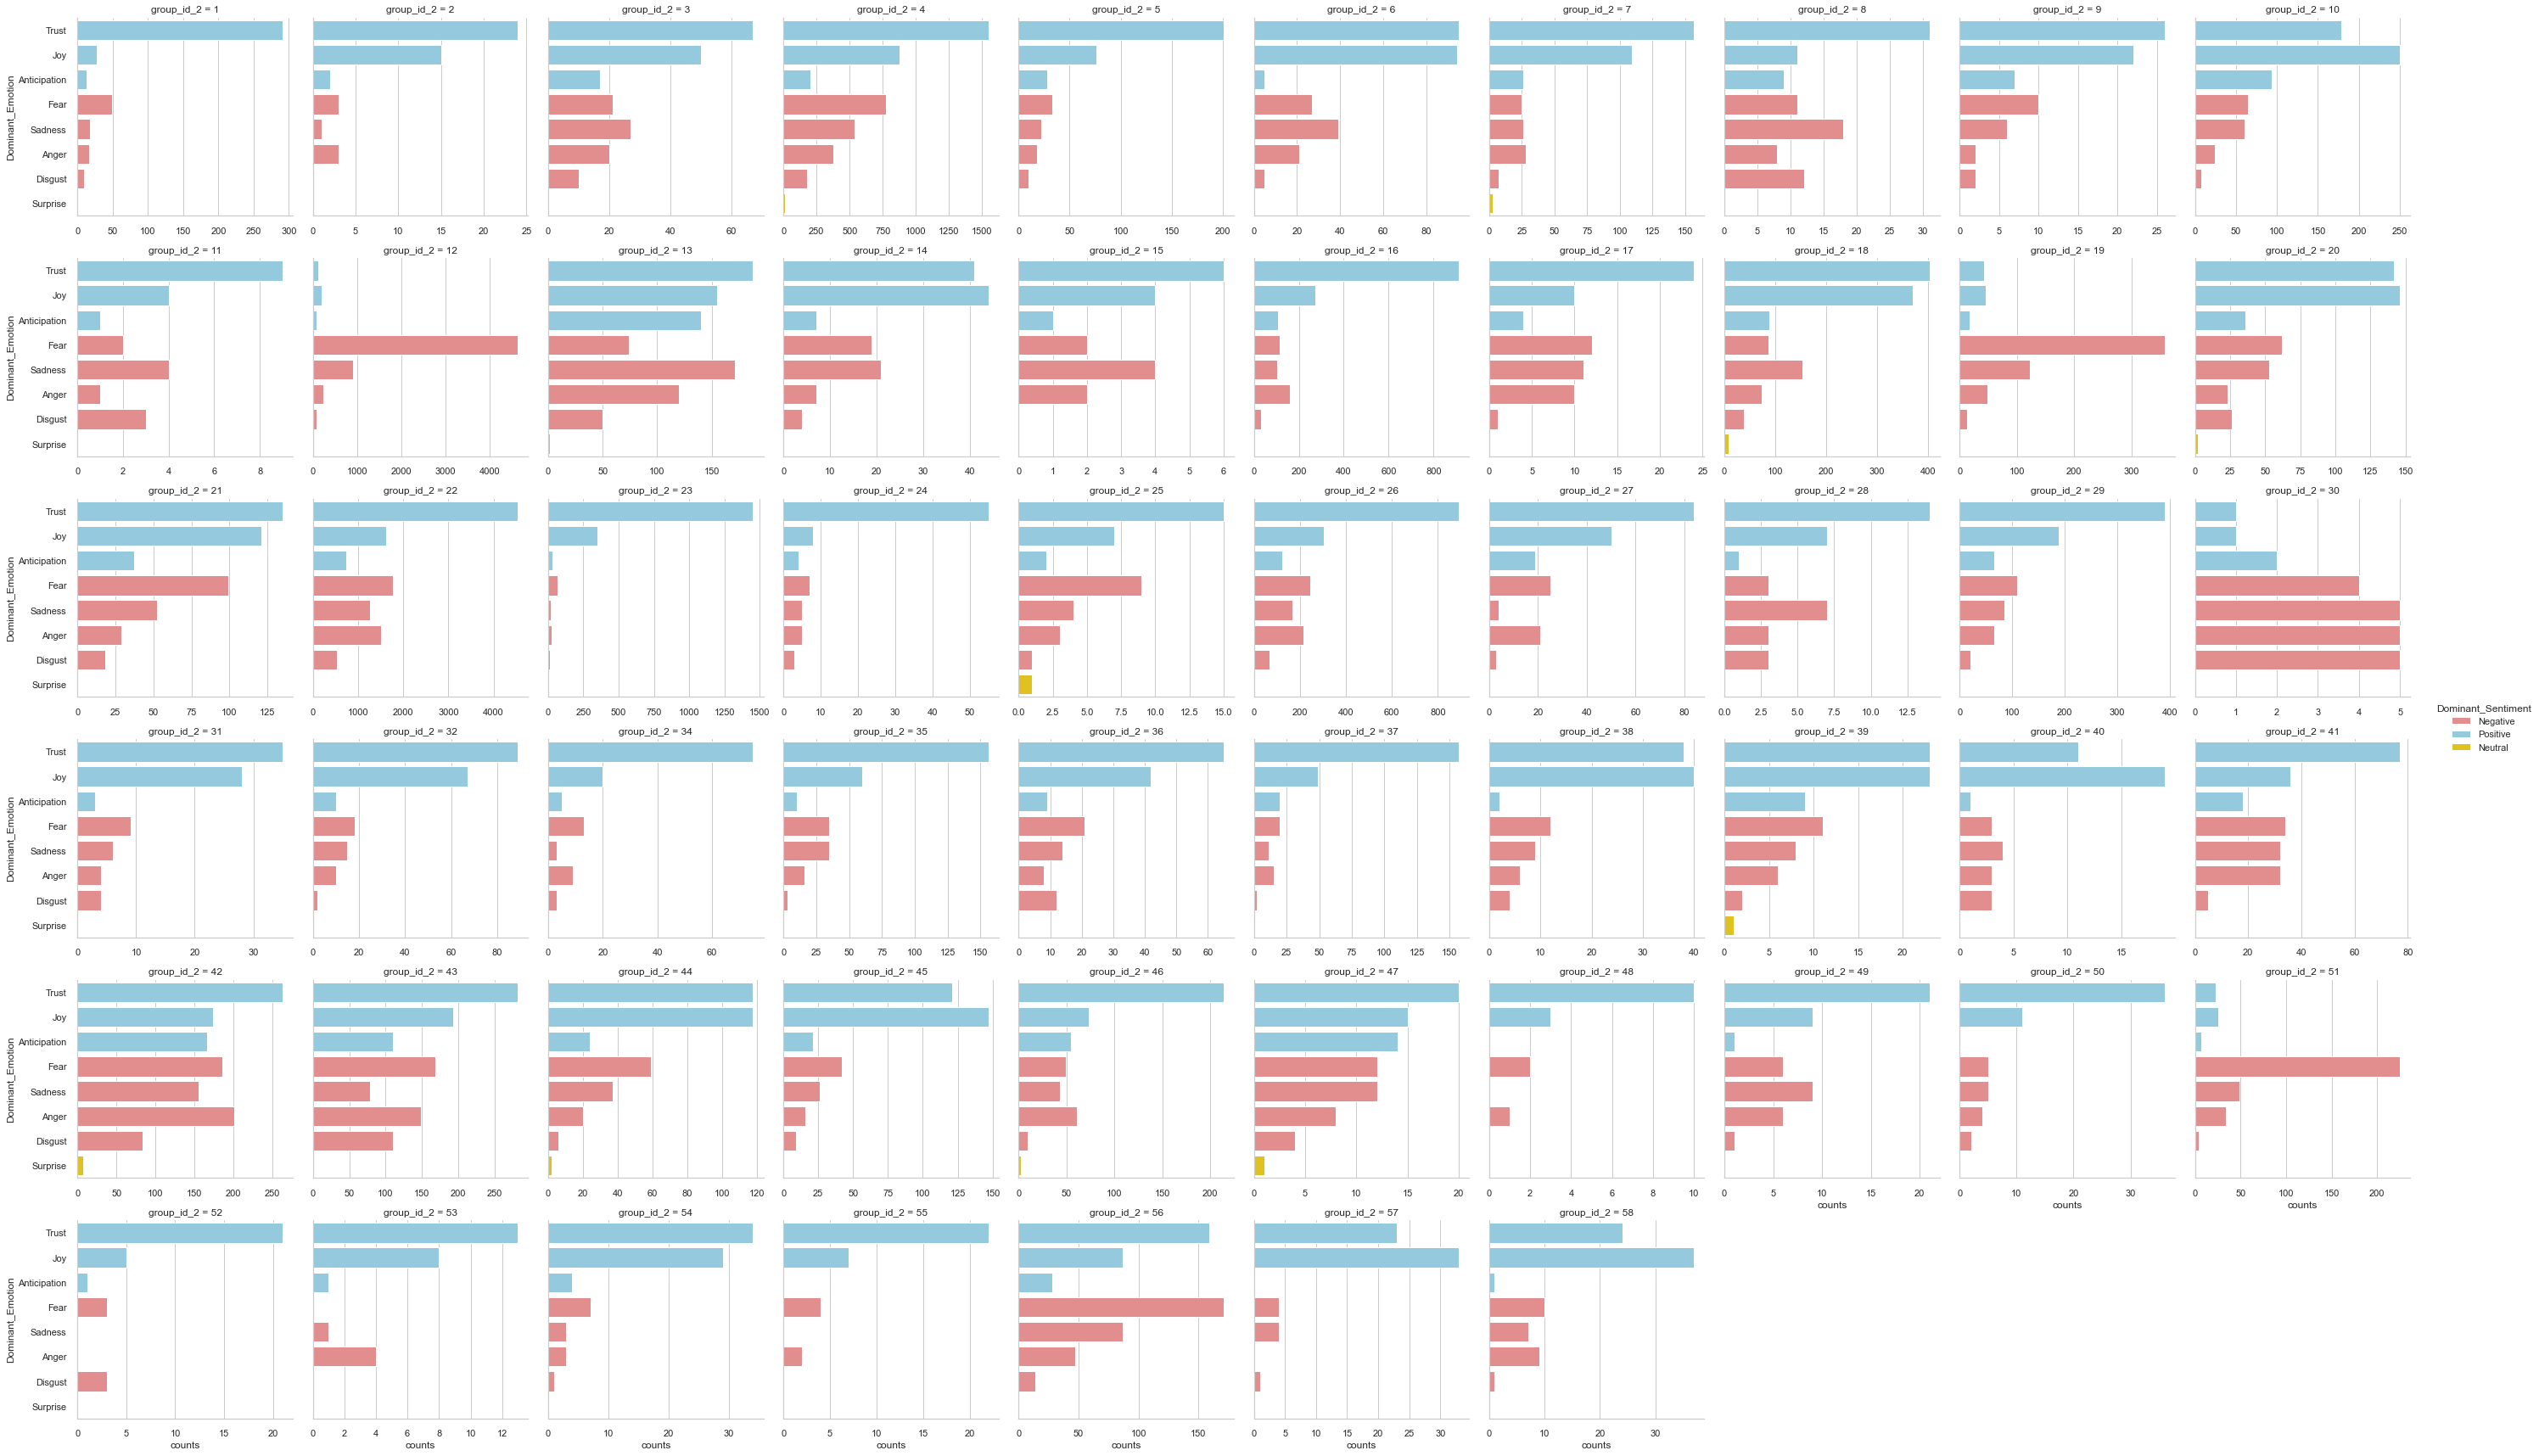

In [38]:
g = sns.catplot(data=dreams_intensity_total,
                kind='bar',
                dodge=False,
                x='counts', y='Dominant_Emotion', 
                col='group_id_2',
                hue="Dominant_Sentiment", 
                col_wrap=10, sharex=False,
                aspect=1,
                height=4,
                palette=sns.color_palette(['lightcoral', 'skyblue',"gold"]),
                order=["Trust","Joy","Anticipation","Fear","Sadness","Anger","Disgust","Surprise"]
               )
plt.savefig(f"{data_directory}/sa/img/comparativo_emociones_total.png")

## Gráficos en el tiempo 

In [42]:
dreams_groups_intensity_vet['x']=np.linspace(0,1,len(dreams_groups_intensity_vet))
dreams_groups_intensity_phil['x']=np.linspace(0,1,len(dreams_groups_intensity_phil))

In [50]:
#dreams_groups_intensity_phil.head()

In [51]:
#dreams_groups_intensity_vet.head()

#### Gráficos transformando los datos

## Por sentimiento

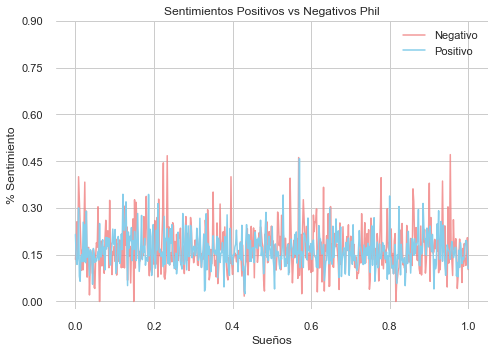

In [52]:
x=dreams_groups_intensity_phil['x']
y_pos=dreams_groups_intensity_phil['Positive_pct']
y_neg=dreams_groups_intensity_phil['Negative_pct']


ax = plt.axes([0,0,1,1], frameon=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("Sentimientos Positivos vs Negativos Phil")
ax.set(xlabel='Sueños', ylabel='% Sentimiento')

plt.tight_layout()
plt.subplots_adjust(top=1)
plt.plot(x, y_neg,color="lightcoral",alpha=0.8)
plt.plot(x, y_pos,color="skyblue",alpha=1)
plt.yticks([0,0.15,0.30,0.45,0.60,0.75,0.9])
ax.legend(['Negativo', 'Positivo'])
plt.savefig(f"{data_directory}/sa/img/pos_vs_neg_phil.png",bbox_inches = 'tight')

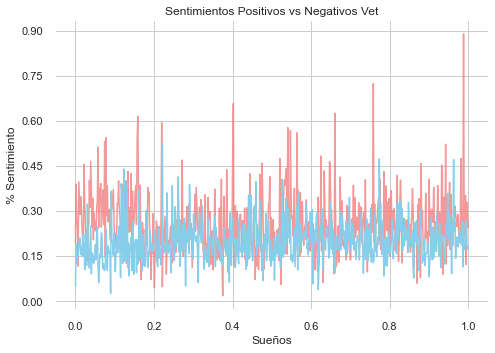

In [41]:
x=dreams_groups_intensity_vet['x']
y_pos=dreams_groups_intensity_vet['Positive_pct']
y_neg=dreams_groups_intensity_vet['Negative_pct']

# xnew = np.linspace(x.min(), x.max(), 100) 

# spl_pos = make_interp_spline(x, y_pos, k=5)  # type: BSpline
# spl_neg = make_interp_spline(x, y_neg, k=5)  # type: BSpline

# smooth_pos = spl_pos(xnew)
# smooth_neg = spl_neg(xnew)

ax = plt.axes([0,0,1,1], frameon=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("Sentimientos Positivos vs Negativos Vet")
ax.set(xlabel='Sueños', ylabel='% Sentimiento')

plt.plot(x, y_neg,color="lightcoral",alpha=0.8)
plt.plot(x, y_pos,color="skyblue",alpha=1)

plt.yticks([0,0.15,0.30,0.45,0.60,0.75,0.9])
plt.savefig(f"{data_directory}/sa/img/pos_vs_neg_vet.png")

## Por emociones

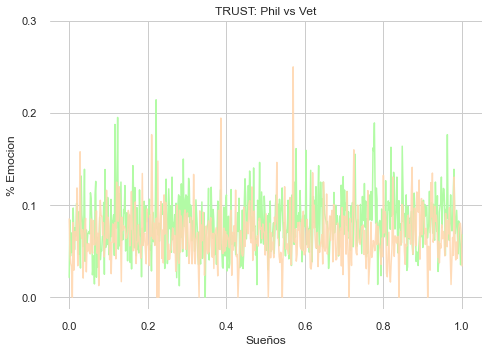

In [43]:
x_phil=dreams_groups_intensity_phil['x']
x_vet=dreams_groups_intensity_vet['x']
y_phil=dreams_groups_intensity_phil['Trust_pct']
y_vet=dreams_groups_intensity_vet['Trust_pct']

ax = plt.axes([0,0,1,1], frameon=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("TRUST: Phil vs Vet")
ax.set(xlabel='Sueños', ylabel='% Emocion')

# plt.plot(xnew, smooth_vet,color="lightcoral",alpha=0.8)
# plt.plot(xnew, smooth_phil,color="skyblue",alpha=1)

plt.plot(x_vet, y_vet,color="#b2fba5",alpha=1)
plt.plot(x_phil, y_phil,color="#ffd8b1",alpha=0.9)

plt.yticks([0,0.1,0.2,0.30])
plt.savefig(f"{data_directory}/sa/img/trust_phil_vs_vet.png")


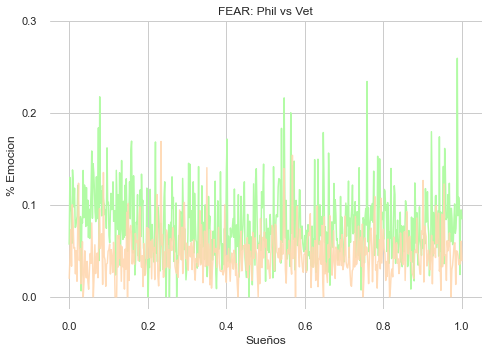

In [44]:
x_phil=dreams_groups_intensity_phil['x']
x_vet=dreams_groups_intensity_vet['x']
y_phil=dreams_groups_intensity_phil['Fear_pct']
y_vet=dreams_groups_intensity_vet['Fear_pct']

ax = plt.axes([0,0,1,1], frameon=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("FEAR: Phil vs Vet")
ax.set(xlabel='Sueños', ylabel='% Emocion')

# plt.plot(xnew, smooth_vet,color="lightcoral",alpha=0.8)
# plt.plot(xnew, smooth_phil,color="skyblue",alpha=1)

plt.plot(x_vet, y_vet,color="#b2fba5",alpha=1)
plt.plot(x_phil, y_phil,color="#ffd8b1",alpha=0.9)

plt.yticks([0,0.1,0.2,0.30])
plt.savefig(f"{data_directory}/sa/img/fear_phil_vs_vet.png")

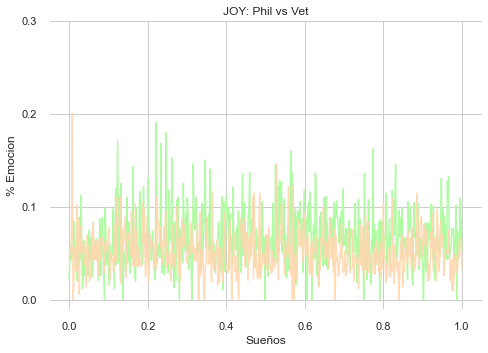

In [45]:
x_phil=dreams_groups_intensity_phil['x']
x_vet=dreams_groups_intensity_vet['x']
y_phil=dreams_groups_intensity_phil['Joy_pct']
y_vet=dreams_groups_intensity_vet['Joy_pct']

ax = plt.axes([0,0,1,1], frameon=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("JOY: Phil vs Vet")
ax.set(xlabel='Sueños', ylabel='% Emocion')

# plt.plot(xnew, smooth_vet,color="lightcoral",alpha=0.8)
# plt.plot(xnew, smooth_phil,color="skyblue",alpha=1)

plt.plot(x_vet, y_vet,color="#b2fba5",alpha=1)
plt.plot(x_phil, y_phil,color="#ffd8b1",alpha=0.9)

plt.yticks([0,0.1,0.2,0.30])
plt.savefig(f"{data_directory}/sa/img/joy_phil_vs_vet.png")

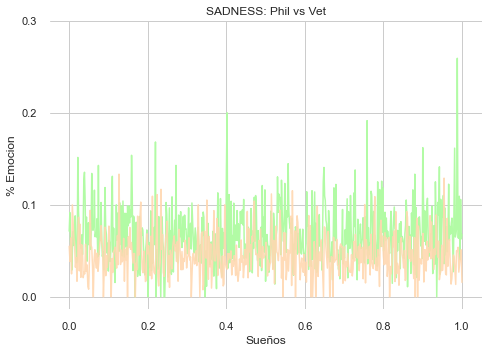

In [46]:
x_phil=dreams_groups_intensity_phil['x']
x_vet=dreams_groups_intensity_vet['x']
y_phil=dreams_groups_intensity_phil['Sadness_pct']
y_vet=dreams_groups_intensity_vet['Sadness_pct']

ax = plt.axes([0,0,1,1], frameon=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("SADNESS: Phil vs Vet")
ax.set(xlabel='Sueños', ylabel='% Emocion')

# plt.plot(xnew, smooth_vet,color="lightcoral",alpha=0.8)
# plt.plot(xnew, smooth_phil,color="skyblue",alpha=1)

plt.plot(x_vet, y_vet,color="#b2fba5",alpha=1)
plt.plot(x_phil, y_phil,color="#ffd8b1",alpha=0.9)

plt.yticks([0,0.1,0.2,0.30])
plt.savefig(f"{data_directory}/sa/img/sadness_phil_vs_vet.png")

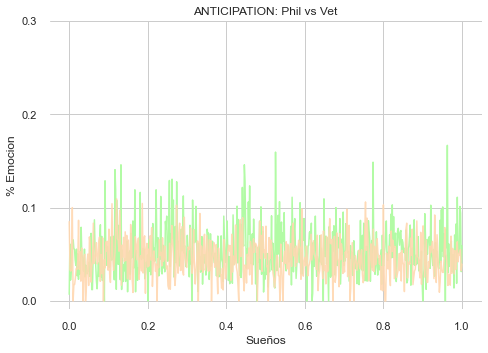

In [47]:
x_phil=dreams_groups_intensity_phil['x']
x_vet=dreams_groups_intensity_vet['x']
y_phil=dreams_groups_intensity_phil['Anticipation_pct']
y_vet=dreams_groups_intensity_vet['Anticipation_pct']

ax = plt.axes([0,0,1,1], frameon=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("ANTICIPATION: Phil vs Vet")
ax.set(xlabel='Sueños', ylabel='% Emocion')

# plt.plot(xnew, smooth_vet,color="lightcoral",alpha=0.8)
# plt.plot(xnew, smooth_phil,color="skyblue",alpha=1)

plt.plot(x_vet, y_vet,color="#b2fba5",alpha=1)
plt.plot(x_phil, y_phil,color="#ffd8b1",alpha=0.9)

plt.yticks([0,0.1,0.2,0.30])
plt.savefig(f"{data_directory}/sa/img/anticipation_phil_vs_vet.png")

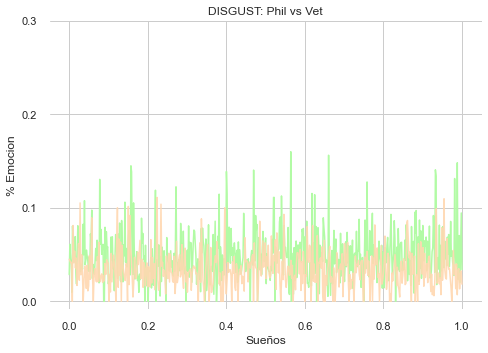

In [48]:
x_phil=dreams_groups_intensity_phil['x']
x_vet=dreams_groups_intensity_vet['x']
y_phil=dreams_groups_intensity_phil['Disgust_pct']
y_vet=dreams_groups_intensity_vet['Disgust_pct']

ax = plt.axes([0,0,1,1], frameon=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("DISGUST: Phil vs Vet")
ax.set(xlabel='Sueños', ylabel='% Emocion')

# plt.plot(xnew, smooth_vet,color="lightcoral",alpha=0.8)
# plt.plot(xnew, smooth_phil,color="skyblue",alpha=1)

plt.plot(x_vet, y_vet,color="#b2fba5",alpha=1)
plt.plot(x_phil, y_phil,color="#ffd8b1",alpha=0.9)
plt.yticks([0,0.1,0.2,0.30])

# plt.figure(figsize=(20,10)) 
plt.savefig(f"{data_directory}/sa/img/disgust_phil_vs_vet.png")

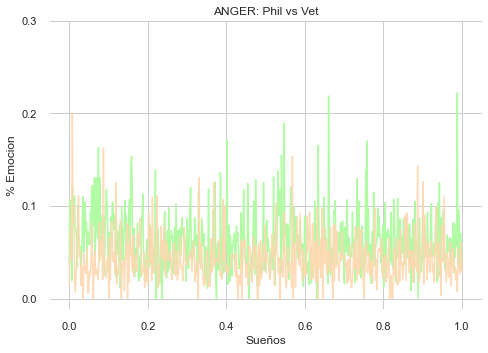

In [49]:
x_phil=dreams_groups_intensity_phil['x']
x_vet=dreams_groups_intensity_vet['x']
y_phil=dreams_groups_intensity_phil['Anger_pct']
y_vet=dreams_groups_intensity_vet['Anger_pct']

ax = plt.axes([0,0,1,1], frameon=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("ANGER: Phil vs Vet")
ax.set(xlabel='Sueños', ylabel='% Emocion')

# plt.plot(xnew, smooth_vet,color="lightcoral",alpha=0.8)
# plt.plot(xnew, smooth_phil,color="skyblue",alpha=1)

plt.plot(x_vet, y_vet,color="#b2fba5",alpha=1)
plt.plot(x_phil, y_phil,color="#ffd8b1",alpha=0.9)
plt.yticks([0,0.1,0.2,0.30])
plt.savefig(f"{data_directory}/sa/img/anger_phil_vs_vet.png")